 _Perform Exploratory Data Analysis_ 

## . _Import Libraries_

In [1]:
# Libraries neeeded to work on the data
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy.stats as stats
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

## . _Import data_

In [3]:
df1 = pd.read_csv('books_final.csv')

In [4]:
df2 = pd.read_csv('rating_final.csv')

In [5]:
df3 = pd.read_csv('users_final.csv')

### _Merge_

In [6]:
data_m = df1.merge(df2,on='isbn')

In [8]:
data = data_m.merge(df3,on='user_id')
data

,Unnamed: 0_x,isbn,book_title,book_author,year_of_publication,publisher,yearOfPublication,Unnamed: 0_y,user_id,book_rating,Unnamed: 0,location,age
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN,9561,2,0,1,"stockton, california, usa",18
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,NaN,9563,8,5,7,"timmins, ontario, canada",34
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,NaN,9564,8,0,7,"timmins, ontario, canada",34
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,NaN,9565,8,0,7,"timmins, ontario, canada",34
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN,9566,8,0,7,"timmins, ontario, canada",34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,271055,087004124X,Anthem,Ayn Rand,1966,Caxton Press,NaN,1084954,259589,8,259588,"venice, florida, usa",19
1031132,271056,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,NaN,1084955,259591,8,259590,"tioga, pennsylvania, usa",39
1031133,271057,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,NaN,1084961,259614,10,259613,"madrid, madrid, spain",22
1031134,271111,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,NaN,1085625,259679,6,259678,"grand prairie, texas, usa",27


### _Drop columns_

In [ ]:
books_final = books.drop(['image_url_s', 'image_url_m', 'image_url_l'],axis=1)

### _Save_

Saving this preprocessed dataset so we can use it in MYSQL ...

In [ ]:
data.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\Working\preprocessed_data.csv')

## . _Data exploring_

In [9]:
pd.set_option('max_row', None) # to get all the column
data.dtypes

Unnamed: 0_x             int64
isbn                    object
book_title              object
book_author             object
year_of_publication      int64
publisher               object
yearOfPublication      float64
Unnamed: 0_y             int64
user_id                  int64
book_rating              int64
Unnamed: 0               int64
location                object
age                      int64
dtype: object

In [10]:
pd.set_option('max_row', None)
data.columns

Index(['Unnamed: 0_x', 'isbn', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'yearOfPublication', 'Unnamed: 0_y',
       'user_id', 'book_rating', 'Unnamed: 0', 'location', 'age'],
      dtype='object')

In [11]:
data.isna().sum()

Unnamed: 0_x                 0
isbn                         0
book_title                   0
book_author                  1
year_of_publication          0
publisher                    0
yearOfPublication      1031136
Unnamed: 0_y                 0
user_id                      0
book_rating                  0
Unnamed: 0                   0
location                     0
age                          0
dtype: int64

In [25]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
print(data['isbn'].unique())

['0195153448' '0002005018' '0060973129' ... '15655122046' '05162443314'
 nan]


In [12]:
print(data.groupby('ratings').size())

KeyError: 'ratings'

In [ ]:
print(data.groupby('age').size())

In [ ]:
data.ratings.value_counts()

In [ ]:
data.info()

In [8]:
#data.drop('offer_accepted' ,axis=1).hist(bins=30, figsize=(9,9))
#pl.suptitle("Histogram for each numeric input variable")
#plt.savefig('average_balance')
#plt.show()

In [9]:
new_ratings_data = data['ratings'][0:40].interpolate(method='linear')

new_income_data.plot()
#plt.show()

NameError: name 'data' is not defined

In [10]:
#plt.hist(data['age'].interpolate(method='polynomial', order=2), bins=20) 
#plt.show()

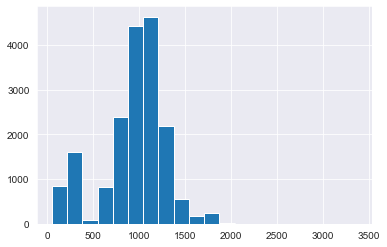

In [112]:
#plt.hist(data['country'].fillna(data['average_balance'].mean()), bins=20)
#plt.show()

In [11]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True)
#plt.show()

NameError: name 'data' is not defined

In [1]:
#for col in data.select_dtypes(np.number):
#    sns.distplot(data[col])
#    plt.show()

In [115]:
data.drop(['MyUnknownColumn'], axis=1, inplace=True)

## . _Data cleaning and wrangling_

In [12]:
# New index 
#data = data.set_index('isbn')


In [13]:
cat = data.select_dtypes('object')
##cat

NameError: name 'data' is not defined

In [14]:
for column in cat.columns:
    print(column, cat[column].unique()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8584/1256865245.py, line 2)

In [15]:
#data.describe().apply(lambda x: round(x,2)) # a lambda just to round it pretty

In [16]:
#data.select_dtypes(np.number)

In [ ]:
# outliers boxplot to identify outliers and remove the unnecessary data

In [17]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    #plt.show()
    mask = np.zeros_like(data.corr())

NameError: name 'data' is not defined

In [18]:
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
#plt.show()

NameError: name 'mask' is not defined

In [2]:
#sns.pairplot(data)

In [19]:
sns.boxplot(x=data['ratings']) 
#plt.show()

NameError: name 'data' is not defined

In [3]:
num = data.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    #plt.show()

NameError: name 'data' is not defined

In [126]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [20]:
data = pd.get_dummies(data, drop_first=True) 


## . _Data pre-processing_ 

Logistic regression

In [ ]:
Scaling numerical variables and encoding categorical variable

In [130]:
X = data.drop('ratings', axis=1)
y = data['ratings']

In [131]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [132]:
numericals = X.select_dtypes(np.number)

In [ ]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [133]:
categoricals = X.select_dtypes(exclude=np.number)

In [134]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [138]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([], shape=(17976, 0), dtype=float64)

In [136]:
cat = data.select_dtypes('object')

In [137]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(17976, 19)


In [135]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [139]:
X = np.concatenate([x_normalized, encoded], axis=1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [141]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [142]:
predictions  = model.predict(X_test)
predictions.shape

(5393,)

In [ ]:
score = model.score(X_test, y_test)
score

## . _Build Models : Unsupervised learning_

Unsupervised learning because we do not have a clear way to tell whether the algorithm is doing well or not - in SL, predictions can be compared with true values (labels) - here there are no performance metrics with which to supervise the task.

Clustering: The most popular task in UL is Clustering. It's popular in the business world because companies usually have big unlabeled datasets of customers.They need to segment those customers in order to make effective decisions like: understanding their behavior, sending targeted emails, offering loyalty promotions, tailoring new products, etc. Clustering algorithms find observations with similarities and group themselves.

Clustering vs. traditional segmentation: Traditionally, subject experts were the ones creating the segmentation: maybe they had some data showing that, in general, customers under and over 25 years old behave differently, and that gender is a clear divide when it comes to shopping. Rich datasets and clustering algorithms can challenge these traditional segmentation. If an e-commerce site has click-through rates in multiple stages of the marketing funnel, email-opening rates and a history of products searched, added to a wish list and purchased (each divided in a few variables by category of product), it's much more difficult to use "instinct" or a couple of bar charts to segment the customers. However, clustering algorithms can find groups of customers that are similar based on these behavioral variables.

### _KMEANS_

In [ ]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
# y = pd.Series(data["target"])

X.head()

In [ ]:
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

In [ ]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters

In [ ]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

In [ ]:
# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

In [ ]:
# Class Weigh

### . _Choosing the best value of k for the KNN_

In [144]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

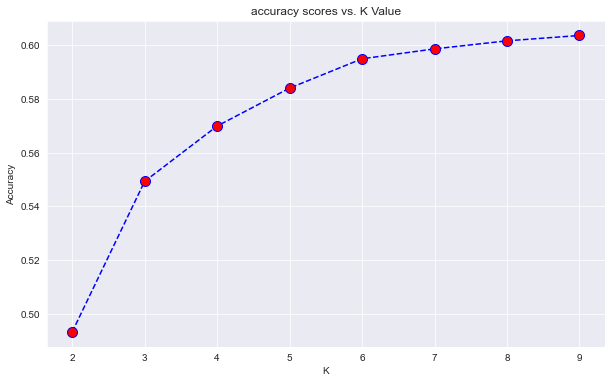

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### . _Measures of accuracies for regression models_

In [146]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, predictions)
score

194.750812033821

In [147]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, predictions)
score

67841.48765657935

In [148]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse

260.46398533497745

### . _R-squared value_

In [150]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.45378463851113215

In [153]:
score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score

0.4479695440778191

### . _Model Validation_

In [154]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.45378463851113215, 260.46398533497745, 67841.48765657935)

In [155]:
mse = mean_squared_error(y_test, predictions)
print(mse)

67841.48765657935


In [156]:
rmse = math.sqrt(mse)
print(rmse)

260.46398533497745


In [157]:
r2 = r2_score(y_test, predictions)
print(r2)

0.45378463851113215


In [158]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

0.45185311201414946
